In [1]:
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from xgboost import XGBClassifier
from sklearn.metrics import *

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("updated_dataset.csv")
data

,length_url,length_hostname,ip,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,status
0,37,19,0,0,1,0.000000,0.000000,0,0,0,...,0,0,1,0,45,-1,0,1,1,0
1,77,23,1,0,1,0.220779,0.000000,0,0,0,...,0,1,0,0,77,5767,0,0,1,1
2,126,50,1,0,0,0.150794,0.000000,0,0,0,...,0,1,0,0,14,4004,5828815,0,1,1
3,18,11,0,0,1,0.000000,0.000000,0,0,0,...,0,1,0,0,62,-1,107721,0,0,0
4,55,15,0,0,1,0.000000,0.000000,0,0,0,...,0,0,1,0,224,8175,8725,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,0,1,0.000000,0.000000,0,0,0,...,0,0,0,0,448,5396,3980,0,0,0
11426,84,18,0,0,1,0.023810,0.000000,0,0,1,...,0,1,0,0,211,6728,0,0,1,1
11427,105,16,1,0,0,0.142857,0.000000,0,0,0,...,0,0,0,0,2809,8515,8,0,1,0
11428,38,30,0,0,1,0.000000,0.000000,0,0,0,...,0,1,0,0,85,2836,2455493,0,0,0


In [4]:
X = data.drop("status", axis=1)
Y = data["status"]
print(X.shape)
print(Y.shape)

(11430, 57)
(11430,)


In [5]:
X_train, X_, Y_train, Y_ = train_test_split(X, Y, test_size=0.30, random_state=42)
X_cv, X_test, Y_cv, Y_test = train_test_split(X_, Y_, test_size=0.50, random_state=42)
del X_,Y_

In [6]:
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_cv.shape)
print(Y_test.shape)

(8001, 57)
(1714, 57)
(1715, 57)
(8001,)
(1714,)
(1715,)


In [7]:
'''dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()'''

'dtc = DecisionTreeClassifier()\nrfc = RandomForestClassifier()'

In [8]:
'''dtc_params = [
    {
        "max_depth" : [2, 4, 5, 6, 8, 10, 11, 12, 14, 16, 18, 20, 21, 25, None],
        "min_samples_split" : [2, 5, 10, 15, 20, 25, 27, 30, 40, 50, 60, 70, 80, 90, 100],
        "criterion" : ["log_loss", "gini", "entropy"],
    }
]'''

'dtc_params = [\n    {\n        "max_depth" : [2, 4, 5, 6, 8, 10, 11, 12, 14, 16, 18, 20, 21, 25, None],\n        "min_samples_split" : [2, 5, 10, 15, 20, 25, 27, 30, 40, 50, 60, 70, 80, 90, 100],\n        "criterion" : ["log_loss", "gini", "entropy"],\n    }\n]'

In [9]:
'''rfc_params = [
    {
        "n_estimators" : [50, 100, 150, 175, 200],
        "max_depth" : [4, 6, 8, 10, 11, 12, 14, 16],
        "min_samples_split" : list(range(2, 12, 2))
    }
] '''

'rfc_params = [\n    {\n        "n_estimators" : [50, 100, 150, 175, 200],\n        "max_depth" : [4, 6, 8, 10, 11, 12, 14, 16],\n        "min_samples_split" : list(range(2, 12, 2))\n    }\n] '

In [10]:
#gs_cv_dtc = GridSearchCV(dtc, dtc_params, cv=4, n_jobs=-1)
#gs_cv_dtc.fit(X_train, Y_train)

In [11]:
#print(gs_cv_dtc.best_params_)

In [12]:
#gs_cv_rfc = GridSearchCV(rfc, rfc_params, cv=4, n_jobs=-1)
#gs_cv_rfc.fit(X_train, Y_train)

In [13]:
#print(gs_cv_rfc.best_params_)

In [14]:
DTC_model = DecisionTreeClassifier(max_depth=12, min_samples_split=25, criterion="gini", max_features="auto", random_state=42)
DTC_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=12, max_features='auto', min_samples_split=25,
                       random_state=42)

In [15]:
print(f"Training Score on DTC model is {DTC_model.score(X_train, Y_train)}")
print(f"CrossValidation Score on DTC model is {DTC_model.score(X_cv, Y_cv)}")

Training Score on DTC model is 0.9388826396700413
CrossValidation Score on DTC model is 0.9101516919486581


In [16]:
RFC_model = RandomForestClassifier(n_estimators=150, max_depth=16, min_samples_split=40, criterion="entropy", max_features="sqrt", random_state=42)
RFC_model.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=16, min_samples_split=40,
                       n_estimators=150, random_state=42)

In [17]:
print(f"Training Score on RFC model is {RFC_model.score(X_train, Y_train)}")
print(f"CrossValidation Score on RFC model is {RFC_model.score(X_cv, Y_cv)}")

Training Score on RFC model is 0.9618797650293713
CrossValidation Score on RFC model is 0.9474912485414235


In [18]:
NN_model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(units=18, activation="relu"),
        tf.keras.layers.Dense(units=2, activation="linear"),
    ]
)

NN_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.00001),
    metrics= ["accuracy"]
)

NN_model.fit(X_train, Y_train, epochs=250)

Epoch 1/250
251/251 [==============================] - 4s 4ms/step - loss: 13729.7188 - accuracy: 0.3678
Epoch 2/250
251/251 [==============================] - 1s 3ms/step - loss: 9941.4014 - accuracy: 0.3747
Epoch 3/250
251/251 [==============================] - 1s 4ms/step - loss: 6188.0146 - accuracy: 0.3818
Epoch 4/250
251/251 [==============================] - 1s 4ms/step - loss: 2441.9600 - accuracy: 0.4002
Epoch 5/250
251/251 [==============================] - 1s 5ms/step - loss: 86.9061 - accuracy: 0.5009
Epoch 6/250
251/251 [==============================] - 1s 6ms/step - loss: 46.7120 - accuracy: 0.5153
Epoch 7/250
251/251 [==============================] - 1s 6ms/step - loss: 40.1603 - accuracy: 0.5109
Epoch 8/250
251/251 [==============================] - 1s 6ms/step - loss: 33.9580 - accuracy: 0.5088
Epoch 9/250
251/251 [==============================] - 1s 5ms/step - loss: 27.2387 - accuracy: 0.5096
Epoch 10/250
251/251 [==============================] - 1s 5ms/step - los

KeyboardInterrupt: 

In [ ]:
loss, accuracy = NN_model.evaluate(X_train, Y_train)

251/251 [==============================] - 0s 1ms/step - loss: 2.7933 - accuracy: 0.8349


In [ ]:
loss, accuracy = NN_model.evaluate(X_cv, Y_cv)

54/54 [==============================] - 0s 1ms/step - loss: 3.1057 - accuracy: 0.8215


In [ ]:
'''xgbc_model = XGBClassifier()'''

In [ ]:
'''xgbc_params = [
    {
        "max_depth" : [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 21, 25],
        "n_estimators" : [50, 100, 150, 175, 200],
        "eta" : [0.01, 0.1, 0.2, 0.3, 0.5],
    }
]'''

In [ ]:
'''gs_cv_xgbc = GridSearchCV(xgbc_model, xgbc_params, cv=5, n_jobs=-1)
gs_cv_xgbc.fit(X_train, Y_train)'''

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid=[{'eta': [0.01, 0.1, 0.2, 0.3, 0.5],
                          'max_depth': [2, 4, 5, 6, 8, 10, 11, 12, 14, 16, 18,
                                        20, 21, 25],
                          'n_estimators': [50, 100, 150, 175, 200]}])

In [ ]:
'''print(gs_cv_xgbc.best_params_)'''

{'eta': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [19]:
model = XGBClassifier(eta=0.1, max_depth=5, n_estimators=200, verbose=1, n_jobs=-1, num_parallel_tree=6, random_state=42)

In [20]:
model.fit(X_train, Y_train, eval_set=[(X_cv, Y_cv)], early_stopping_rounds=20)

[0]	validation_0-logloss:0.62387
[1]	validation_0-logloss:0.56748
[2]	validation_0-logloss:0.51958
[3]	validation_0-logloss:0.47944
[4]	validation_0-logloss:0.44522
[5]	validation_0-logloss:0.41549
[6]	validation_0-logloss:0.38903
[7]	validation_0-logloss:0.36535
[8]	validation_0-logloss:0.34487
[9]	validation_0-logloss:0.32699
[10]	validation_0-logloss:0.31117
[11]	validation_0-logloss:0.29688
[12]	validation_0-logloss:0.28432
[13]	validation_0-logloss:0.27347
[14]	validation_0-logloss:0.26343
[15]	validation_0-logloss:0.25414
[16]	validation_0-logloss:0.24633
[17]	validation_0-logloss:0.23896
[18]	validation_0-logloss:0.23195
[19]	validation_0-logloss:0.22602
[20]	validation_0-logloss:0.22090
[21]	validation_0-logloss:0.21626
[22]	validation_0-logloss:0.21135
[23]	validation_0-logloss:0.20618
[24]	validation_0-logloss:0.20188
[25]	validation_0-logloss:0.19776
[26]	validation_0-logloss:0.19419
[27]	validation_0-logloss:0.19088
[28]	validation_0-logloss:0.18826
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=-1, num_parallel_tree=6, ...)

In [21]:
model.score(X_train, Y_train)

0.9888763904511936

In [22]:
model.score(X_cv, Y_cv)

0.9585764294049008

In [23]:
Y_pred = model.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.9620991253644315

In [24]:
print(Y_pred)

[0 0 0 ... 0 0 1]


In [25]:
print(Y_test)

9000    0
9473    0
6930    0
7505    1
9178    0
       ..
2291    0
9315    1
2955    0
3593    0
9132    1
Name: status, Length: 1715, dtype: int64


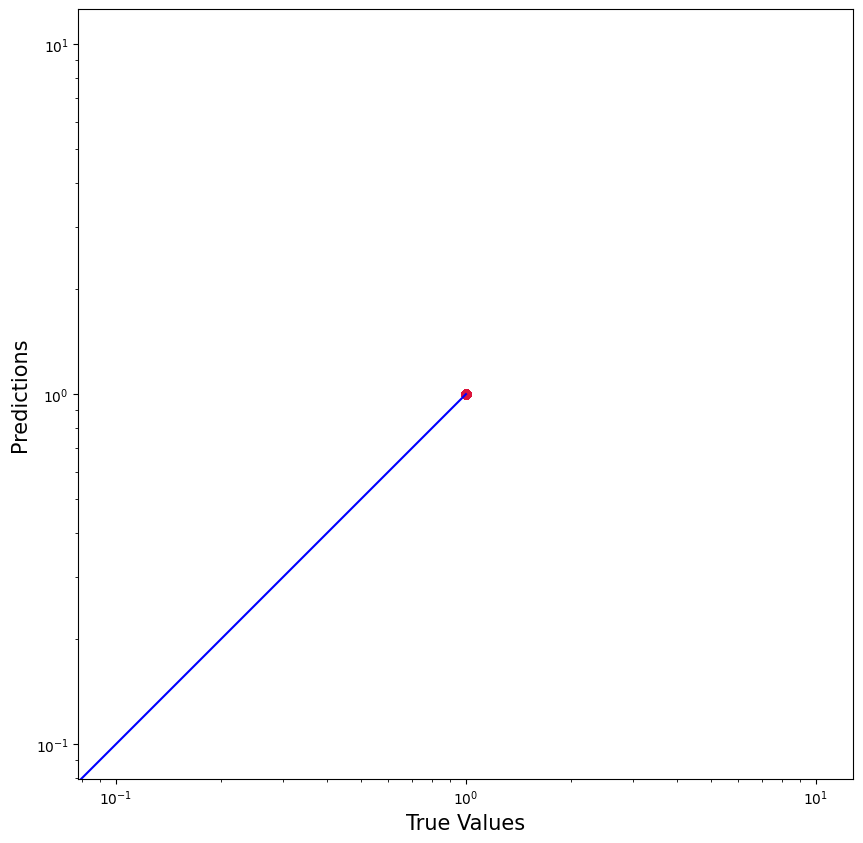

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred), max(Y_test))
p2 = min(min(Y_pred), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [29]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[814  38]
 [ 27 836]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       852
           1       0.96      0.97      0.96       863

    accuracy                           0.96      1715
   macro avg       0.96      0.96      0.96      1715
weighted avg       0.96      0.96      0.96      1715



<b>The model with the best accuracy in train and test is XGBClassifier</b>

<b>Building a Pipeline with XGBClassifier for Deployment and Production</b>